In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
from ocat import OCAT
from test import CAModel,Testing1
import helpers
from joblib import Parallel, delayed,parallel_backend

In [139]:
import sys
del sys.modules["test"]

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    images=np.array(images)
    values = {}
    count = 0
    for state in images:
        for row in state:
            for j,col in enumerate(row):
                if col not in values:
                    count+=1
                    values[col] = count
                row[j] = values[col]
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    if values != None:
        values = [values[key] for key in values]
        values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
        vlscls = list(filter(lambda x: x != None,vlscls))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [4]:
data= np.load("data/data.npy")

In [5]:
np.shape(data)

(300, 400, 640)

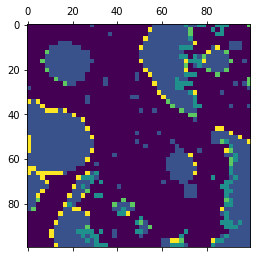

In [6]:
plt.matshow(data[-1,150:250,270:370])

In [7]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:200,150:250,270:370],neighborhood,1,-1)

12
34


56
7

8
9
1011

12
1314
15

16
1718

19
20
21
22
23
24
25
26
27
28
29
3031

32
33
34
35
36
37
38
39
40
41
4243

44
45
46
47
48
49
50
51
52
53
54
55
56
57
5859

60
61
6263

64
65
6667

68
69
70
71
72
73
74
7576

77
78
7980

81
82
8384

85
8687

88
89
9091
92

93
9495

96
97
98
99100

101
102
103104

105
106107

108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138139

140
141
142
143
144
145
146147

148
149
150
151
152
153
154
155
156
157
158159

160
161
162163

164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186187

188
189
190
191
192
193
194195

196
197
198199



In [8]:
modelGGA = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=0,noChilds=10,noChromosomes=100)

In [9]:
modelGGA.run()

config saved at saves/Experiment1/29_01_20_23_33_59/config.json
iteration 1
goal = 1goal = 4
goal = 2

goal = 3
goal 4 elapsed time: 1.1969969272613525
goal = 5
goal 3 elapsed time: 1.4209985733032227
goal 2 elapsed time: 1.498000144958496
goal 1 elapsed time: 1.5739994049072266
goal 5 elapsed time: 0.5409958362579346
iteration 2
goal = 1goal = 4
goal = 2

goal = 3
goal 4 elapsed time: 0.20099854469299316goal 2 elapsed time: 0.20600128173828125

goal = 5
goal 3 elapsed time: 0.22800374031066895
goal 1 elapsed time: 0.26400017738342285
goal 5 elapsed time: 0.08699917793273926
iteration 3
goal = 1goal = 4goal = 2


goal = 3
goal 4 elapsed time: 0.18000221252441406
goal = 5goal 3 elapsed time: 0.1959996223449707

goal 1 elapsed time: 0.24599885940551758
goal 2 elapsed time: 0.2709980010986328
goal 5 elapsed time: 0.10700297355651855
iteration 4
goal = 1goal = 4goal = 2


goal = 3
goal 1 elapsed time: 0.21400022506713867goal 3 elapsed time: 0.20400047302246094goal 4 elapsed time: 0.2440021

In [10]:
caggamodel = CAModel(modelGGA.rules,neighborhood,1,-1)

In [11]:
modelOCAT = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [12]:
modelOCAT.train()

training for value 1
1838
1710
1666
1653
1555
1501
1489
1479
1431
1400
1391
1371
1347
1337
1233
1221
1184
1166
1151
1142
1124
1124
1103
1102
1093
1092
1074
1044
1026
1017
1012
1006
994
884
881
863
861
857
853
848
840
825
823
816
801
788
764
764
752
740
723
717
707
671
659
657
614
611
604
604
595
594
591
584
583
580
564
559
552
541
535
530
527
527
527
526
510
508
504
498
497
495
490
489
487
479
479
468
467
458
455
453
451
449
448
443
441
433
428
424
418
418
412
410
408
405
404
401
400
389
388
386
382
380
380
380
380
380
378
373
368
352
350
350
350
348
344
342
341
341
340
336
336
328
324
322
321
321
321
319
318
314
313
311
305
305
302
300
294
292
292
291
291
290
290
290
289
289
288
287
286
284
284
283
279
279
277
277
272
269
268
264
264
263
256
255
255
255
254
252
249
243
238
236
236
236
234
234
234
231
231
231
231
230
229
229
227
227
225
225
221
220
219
219
217
217
217
212
211
211
211
211
209
207
207
203
202
199
198
198
198
197
197
197
197
197
196
195
193
190
190
190
190
190
187
186
186

[[1,
  [{(1, 5, '>='),
    (3, 2, '<'),
    (3, 3, '>='),
    (4, 2, '<'),
    (5, 1, '<'),
    (5, 3, '>=')},
   {(0, 3, '>='), (3, 2, '>='), (4, 2, '<'), (5, 4, '<'), (5, 5, '>=')},
   {(1, 4, '>='), (2, 5, '<'), (4, 2, '<'), (4, 4, '<'), (6, 5, '>=')},
   {(0, 5, '>='),
    (2, 3, '>='),
    (4, 2, '<'),
    (4, 3, '>='),
    (5, 2, '<'),
    (6, 4, '>='),
    (6, 5, '>=')},
   {(0, 3, '>='),
    (1, 2, '<'),
    (4, 2, '<'),
    (5, 3, '>='),
    (6, 5, '>='),
    (7, 1, '<')},
   {(2, 1, '>='), (4, 2, '<'), (5, 4, '<')},
   {(0, 3, '>='),
    (2, 3, '>='),
    (4, 2, '<'),
    (5, 1, '<'),
    (6, 1, '<'),
    (7, 3, '>=')},
   {(0, 2, '<'), (0, 3, '>='), (4, 2, '<'), (7, 3, '>='), (8, 2, '<')},
   {(4, 2, '<'), (4, 5, '<'), (5, 1, '<'), (5, 3, '>='), (6, 4, '>=')},
   {(0, 1, '>='), (4, 3, '<'), (6, 4, '<'), (7, 2, '<')},
   {(0, 2, '<'),
    (3, 4, '>='),
    (3, 5, '>='),
    (4, 2, '<'),
    (4, 4, '<'),
    (5, 1, '<'),
    (7, 3, '<'),
    (8, 4, '>=')},
   {(2, 2, '>='), (4

In [13]:
modelOCAT.rulesstr

{1: 'lambda x: ((x[5] >= 3 or x[4] < 2 or x[3] >= 3 or x[1] >= 5 or x[3] < 2 or x[5] < 1) and (x[3] >= 2 or x[5] >= 5 or x[0] >= 3 or x[5] < 4 or x[4] < 2) and (x[2] < 5 or x[1] >= 4 or x[4] < 4 or x[4] < 2 or x[6] >= 5) and (x[5] < 2 or x[6] >= 4 or x[4] >= 3 or x[0] >= 5 or x[2] >= 3 or x[4] < 2 or x[6] >= 5) and (x[5] >= 3 or x[7] < 1 or x[1] < 2 or x[0] >= 3 or x[4] < 2 or x[6] >= 5) and (x[5] < 4 or x[4] < 2 or x[2] >= 1) and (x[4] < 2 or x[7] >= 3 or x[0] >= 3 or x[6] < 1 or x[2] >= 3 or x[5] < 1) and (x[8] < 2 or x[7] >= 3 or x[0] < 2 or x[0] >= 3 or x[4] < 2) and (x[5] >= 3 or x[4] < 2 or x[6] >= 4 or x[4] < 5 or x[5] < 1) and (x[6] < 4 or x[4] < 3 or x[7] < 2 or x[0] >= 1) and (x[4] < 2 or x[3] >= 5 or x[8] >= 4 or x[0] < 2 or x[3] >= 4 or x[7] < 3 or x[4] < 4 or x[5] < 1) and (x[5] < 1 or x[7] < 1 or x[2] >= 2 or x[8] >= 2 or x[4] < 2) and (x[2] < 5 or x[4] < 5 or x[5] >= 4 or x[8] >= 5 or x[1] >= 5 or x[3] < 1 or x[4] < 2 or x[2] < 1) and (x[3] >= 5 or x[3] < 4 or x[6] >= 4 

In [14]:
modelOCAT.conflicts

{'[1 1 1 1 1 1 1 1 1]': [(4, 1)],
 '[2 2 2 1 1 1 1 1 1]': [(4, 1)],
 '[2 1 1 2 1 1 2 1 1]': [(4, 1)],
 '[1 1 2 1 1 2 1 1 2]': [(4, 1)],
 '[1 1 1 1 1 1 2 2 2]': [(4, 1)],
 '[2 2 2 2 2 2 2 2 2]': [(3, 2)],
 '[3 3 2 2 2 2 2 2 2]': [(3, 2)],
 '[3 3 3 2 2 2 2 2 2]': [(3, 2)],
 '[2 2 2 2 2 2 3 3 2]': [(3, 2)],
 '[3 2 2 3 2 2 3 3 3]': [(3, 2)],
 '[2 3 3 3 2 2 3 2 2]': [(3, 2)],
 '[2 2 3 2 2 3 3 3 2]': [(3, 2)],
 '[2 2 2 2 2 2 2 3 3]': [(3, 2)],
 '[2 2 2 2 2 3 2 2 3]': [(3, 2)],
 '[4 4 1 4 4 1 1 1 1]': [(5, 4)],
 '[4 4 4 4 4 4 1 1 1]': [(5, 4)],
 '[1 4 4 1 4 4 1 1 1]': [(5, 4)],
 '[2 2 2 4 4 1 4 4 1]': [(5, 4)],
 '[2 2 2 4 4 4 4 4 4]': [(5, 4)],
 '[2 2 2 1 4 4 1 4 4]': [(5, 4)],
 '[2 4 4 2 4 4 2 1 1]': [(5, 4)],
 '[4 4 2 4 4 2 1 1 2]': [(5, 4)],
 '[4 4 1 4 4 1 4 4 1]': [(5, 4)],
 '[2 4 4 2 4 4 2 4 4]': [(5, 4)],
 '[4 4 2 4 4 2 4 4 2]': [(5, 4)],
 '[1 4 4 1 4 4 1 4 4]': [(5, 4)],
 '[1 1 1 4 4 1 4 4 1]': [(5, 4)],
 '[2 1 1 2 4 4 2 4 4]': [(5, 4)],
 '[1 1 2 4 4 2 4 4 2]': [(5, 4)],
 '[1 1 1 1 4 4

In [15]:
id = 300
count = {}
other = {}
for id in range(len(data)):
    for op in modelOCAT.rules2:
        if modelOCAT.rules2[op](data[id,:-1]) and op == data[id,-1]:
            if op not in count:
                count[op] = 0
            count[op] +=1
            break
        if modelOCAT.rules2[op](data[id,:-1]) and  op != data[id,-1]:
            if op not in other:
                other[op] = 0
            other[op] +=1
            break
count,other

({1: 1094189, 2: 615915, 3: 74655, 4: 15837, 5: 13980},
 {1: 47746, 2: 42505, 4: 36596, 5: 16591, 3: 31986})

In [16]:
caocatmodel = CAModel(modelOCAT.rules2,neighborhood,1,-1)

In [17]:
data= np.load("data/data.npy")
data = data[:,150:250,270:370]
data=np.array(data)

Testing:
state 1/300
Static : 9536/9536
Dynamic : 0/464
state 2/300
Static : 9984/9984
Dynamic : 0/16
state 3/300
Static : 9536/9536
Dynamic : 0/464
state 4/300
Static : 9988/9988
Dynamic : 0/12
state 5/300
Static : 9536/9536
Dynamic : 0/464
state 6/300
Static : 9968/9968
Dynamic : 0/32
state 7/300
Static : 9524/9524
Dynamic : 11/476
state 8/300
Static : 9951/9952
Dynamic : 16/48
state 9/300
Static : 9517/9520
Dynamic : 11/480
state 10/300
Static : 9952/9956
Dynamic : 11/44
state 11/300
Static : 9514/9516
Dynamic : 14/484
state 12/300
Static : 9927/9928
Dynamic : 21/72
state 13/300
Static : 9523/9532
Dynamic : 11/468
state 14/300
Static : 9905/9912
Dynamic : 19/88
state 15/300
Static : 9516/9528
Dynamic : 16/472
state 16/300
Static : 9889/9904
Dynamic : 11/96
state 17/300
Static : 9519/9532
Dynamic : 6/468
state 18/300
Static : 9719/9720
Dynamic : 18/280
state 19/300
Static : 9507/9524
Dynamic : 21/476
state 20/300
Static : 9842/9864
Dynamic : 15/136
state 21/300
Static : 9507/9532
Dyn

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

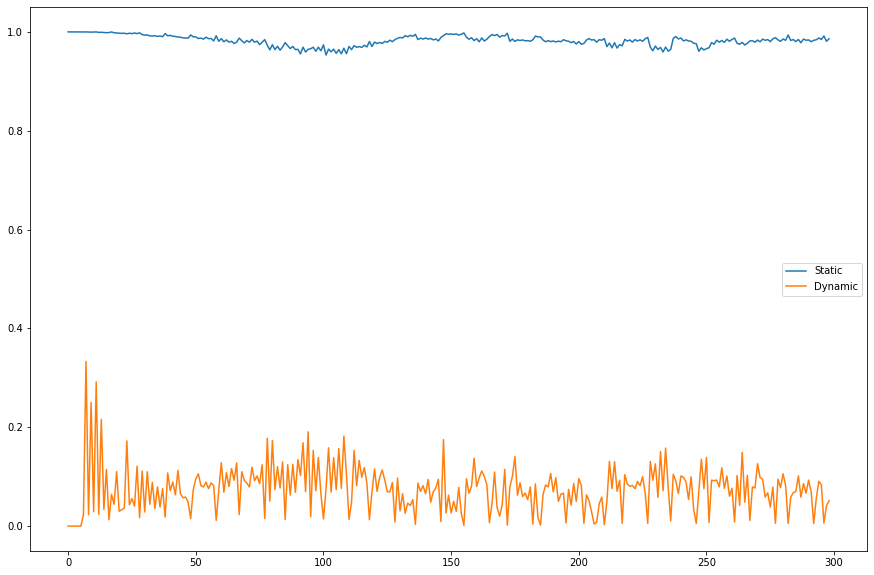

In [18]:
test1 = Testing1(data,caocatmodel,verbose=1)
test1.run()
test1.plot()

Testing:
state 1/300
Static : 9536/9536
Dynamic : 0/464
state 2/300
Static : 9520/9984
Dynamic : 0/16
state 3/300
Static : 9536/9536
Dynamic : 464/464
state 4/300
Static : 9988/9988
Dynamic : 0/12
state 5/300
Static : 9536/9536
Dynamic : 0/464
state 6/300
Static : 9968/9968
Dynamic : 0/32
state 7/300
Static : 9524/9524
Dynamic : 0/476
state 8/300
Static : 9480/9952
Dynamic : 0/48
state 9/300
Static : 9520/9520
Dynamic : 472/480
state 10/300
Static : 9948/9956
Dynamic : 0/44
state 11/300
Static : 9516/9516
Dynamic : 8/484
state 12/300
Static : 9920/9928
Dynamic : 0/72
state 13/300
Static : 9532/9532
Dynamic : 8/468
state 14/300
Static : 9460/9912
Dynamic : 0/88
state 15/300
Static : 9528/9528
Dynamic : 452/472
state 16/300
Static : 9896/9904
Dynamic : 0/96
state 17/300
Static : 9532/9532
Dynamic : 8/468
state 18/300
Static : 9720/9720
Dynamic : 0/280
state 19/300
Static : 9524/9524
Dynamic : 16/476
state 20/300
Static : 9428/9864
Dynamic : 0/136
state 21/300
Static : 9532/9532
Dynamic :

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

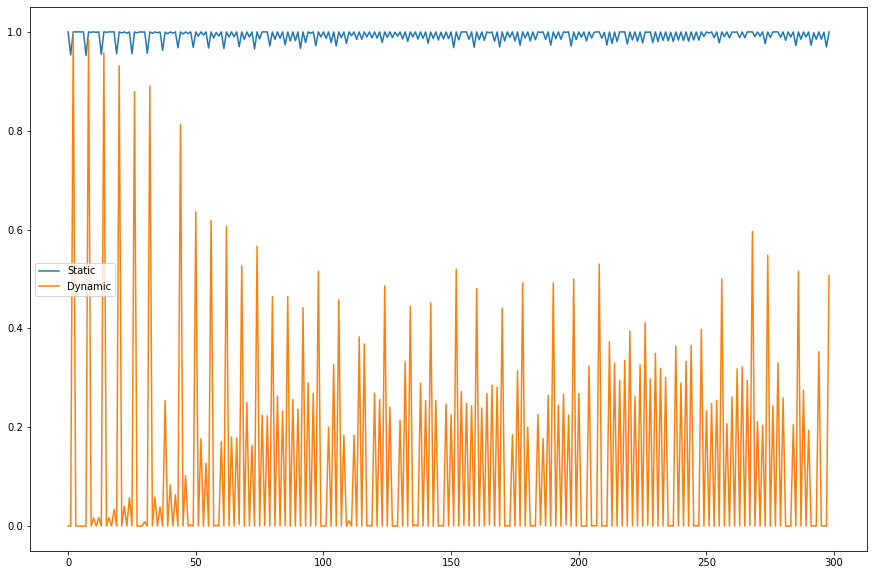

In [19]:
test2 = Testing1(data,caggamodel,verbose=1)
test2.run()
test2.plot()

In [20]:
data.shape

(300, 100, 100)

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

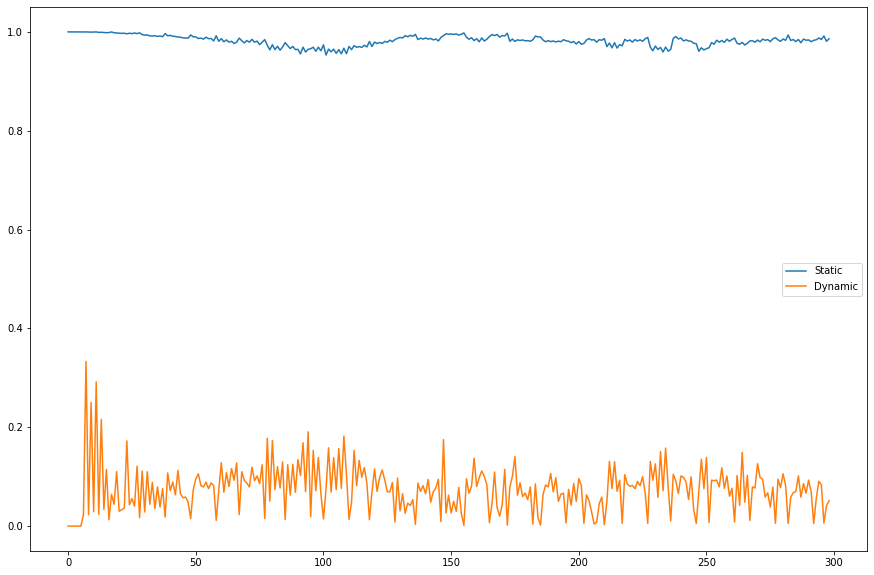

In [21]:
test1.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

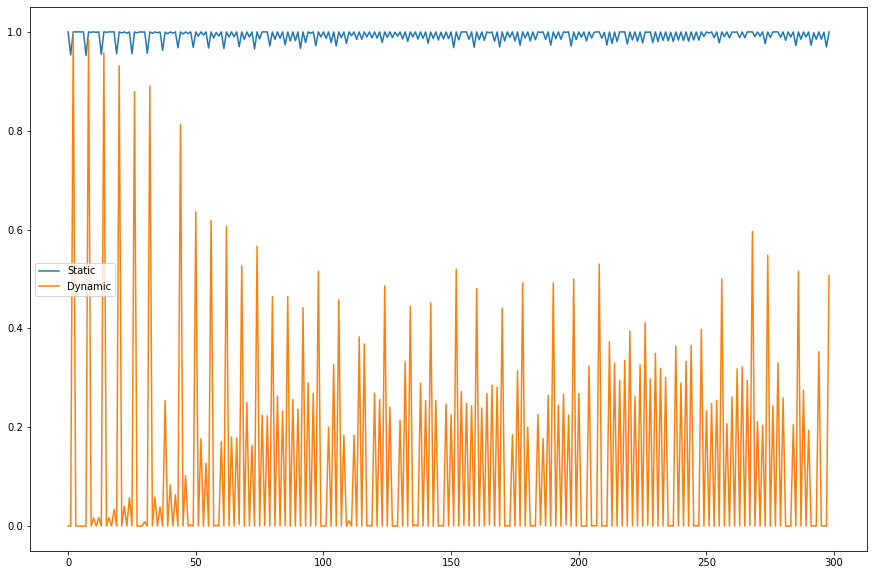

In [22]:
test2.plot()